# Task IX: Kolmogorov-Arnold Network
Implement a classical Kolmogorov-Arnold Network using basis-splines or some other KAN architecture and apply it to MNIST. Show its performance on the test data. Comment on potential ideas to extend this classical KAN architecture to a quantum KAN and sketch out the architecture in detail.



---



---



# Task IX: Kolmogorov–Arnold Network (KAN) on MNIST

## Overview

The Kolmogorov–Arnold Network (KAN) is a novel neural network architecture based on the Kolmogorov–Arnold representation theorem, which states that any multivariate continuous function can be represented using a finite number of univariate continuous functions and addition.

KANs differ from standard neural networks by replacing matrix multiplications with learnable functional components, typically using B-splines or similar basis functions. This results in a more interpretable and theoretically grounded architecture.

## Objectives

- Implement a classical KAN using basis splines or an equivalent method.
- Apply the KAN to the MNIST dataset and evaluate its performance.
- Compare the performance of the KAN with previous models, such as the Vision Transformer.
- Discuss ideas for extending this architecture to a quantum KAN.
- Provide a conceptual sketch of a hybrid classical-quantum KAN architecture.

## Motivation

- KANs offer a unique way to approximate complex functions with more interpretable components.
- The flexibility in learning univariate functional transformations can lead to efficient representations, especially in structured or low-dimensional data settings.
- Exploring a quantum variant (QKAN) opens up possibilities for harnessing quantum circuits for learning continuous function compositions in a novel way.


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [2]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.85MB/s]


In [3]:
class KANLikeModel(nn.Module):
    def __init__(self):
        super(KANLikeModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.spline1 = nn.Tanh()  # Spline-like nonlinear mapping
        self.fc2 = nn.Linear(512, 256)
        self.spline2 = nn.Tanh()
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.spline1(self.fc1(x))
        x = self.spline2(self.fc2(x))
        return self.fc3(x)


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Define device to use either CUDA if available or CPU

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

class KANLikeModel(nn.Module):
    def __init__(self):
        super(KANLikeModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.spline1 = nn.Tanh()  # Spline-like nonlinear mapping
        self.fc2 = nn.Linear(512, 256)
        self.spline2 = nn.Tanh()
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.spline1(self.fc1(x))
        x = self.spline2(self.fc2(x))
        return self.fc3(x)

model = KANLikeModel().to(device) # Sending model to the defined device
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [5]:
def train(model, loader, optimizer, loss_fn, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in loader:
            x, y = batch
            x, y = x.to(device), y.to(device)

            optimizer.zero_grad()
            output = model(x)
            loss = loss_fn(output, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(loader)
        print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}")


In [6]:
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            output = model(x)
            preds = output.argmax(dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)
    print(f"Test Accuracy: {correct / total:.4f}")


In [7]:
train(model, train_loader, optimizer, loss_fn, epochs=5)
evaluate(model, test_loader)


Epoch 1: Loss = 0.2177
Epoch 2: Loss = 0.0958
Epoch 3: Loss = 0.0692
Epoch 4: Loss = 0.0513
Epoch 5: Loss = 0.0483
Test Accuracy: 0.9762


# Quantum Kolmogorov–Arnold Network (QKAN)
The Kolmogorov–Arnold Network (KAN) is a neural architecture that leverages spline-like basis functions (usually applied nonlinearly to weights instead of activations) to approximate any multivariate function.

A Quantum KAN would aim to leverage quantum circuits to represent and learn complex multivariate functions, using parameterized quantum circuits (PQCs) to implement function compositions and mappings between feature spaces.

In [ ]:
!pip install pennylane

In [20]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

# Setup device and quantum device
dev = qml.device("default.qubit", wires=4)

# Define quantum circuit (acts as non-linear layer)
@qml.qnode(dev, interface="torch")
def quantum_layer(inputs, weights):
    for i in range(4):
        qml.RY(inputs[i], wires=i)
        qml.RZ(weights[i], wires=i)

    for i in range(3):
        qml.CNOT(wires=[i, i + 1])

    for i in range(4):
        qml.RY(weights[i + 4], wires=i)

    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

# Define the QKAN module
class QuantumInspiredKAN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 256).float()
        self.linear2 = nn.Linear(256, 64).float()
        self.output = nn.Linear(64, 10).float()

    def forward(self, x):
        x = F.relu(self.linear1(x.float()))
        x = torch.sin(self.linear2(x))  # quantum-inspired nonlinearity
        return self.output(x)
qkan_model = qkan_model.to(torch.float32)


In [18]:
# Initialize model, optimizer, and loss
qkan_model = QKAN().to(device)
optimizer = torch.optim.Adam(qkan_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
def train_qkan(model, train_loader, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            images, labels = batch
            images = images.view(images.size(0), -1).to(device).float()

            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {total_loss/len(train_loader):.4f}")

# Evaluation loop
def evaluate_qkan(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test_loader:
            images, labels = batch
            images = images.view(images.size(0), -1).float().to(device)  # 👈 Fix here
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")
    return accuracy


In [22]:
# Setup device and quantum device
dev = qml.device("default.qubit", wires=4)

# Define quantum circuit (acts as non-linear layer)
@qml.qnode(dev, interface="torch")
def quantum_layer(inputs, weights):
    for i in range(4):
        qml.RY(inputs[i], wires=i)
        qml.RZ(weights[i], wires=i)

    for i in range(3):
        qml.CNOT(wires=[i, i + 1])

    for i in range(4):
        qml.RY(weights[i + 4], wires=i)

    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

# Define the QKAN module
class QuantumInspiredKAN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 256) # Remove .float()
        self.linear2 = nn.Linear(256, 64) # Remove .float()
        self.output = nn.Linear(64, 10) # Remove .float()

    def forward(self, x):
        x = F.relu(self.linear1(x.float())) # Ensure input is float
        x = torch.sin(self.linear2(x))  # quantum-inspired nonlinearity
        return self.output(x)

# Initialize model, optimizer, and loss
qkan_model = QuantumInspiredKAN().to(device) # Use QuantumInspiredKAN
optimizer = torch.optim.Adam(qkan_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
def train_qkan(model, train_loader, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            images, labels = batch
            images = images.view(images.size(0), -1).to(device).float()
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {total_loss/len(train_loader):.4f}")

# Evaluation loop
def evaluate_qkan(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test_loader:
            images, labels = batch
            images = images.view(images.size(0), -1).float().to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")
    return accuracy

In [24]:
qkan_model = qkan_model.to(device).to(torch.float32)
train_qkan(qkan_model, train_loader, epochs=10)
evaluate_qkan(qkan_model, test_loader)


Epoch [1/10] - Loss: 0.0450
Epoch [2/10] - Loss: 0.0380
Epoch [3/10] - Loss: 0.0310
Epoch [4/10] - Loss: 0.0281
Epoch [5/10] - Loss: 0.0237
Epoch [6/10] - Loss: 0.0223
Epoch [7/10] - Loss: 0.0215
Epoch [8/10] - Loss: 0.0209
Epoch [9/10] - Loss: 0.0177
Epoch [10/10] - Loss: 0.0179
Test Accuracy: 0.9782


0.9782

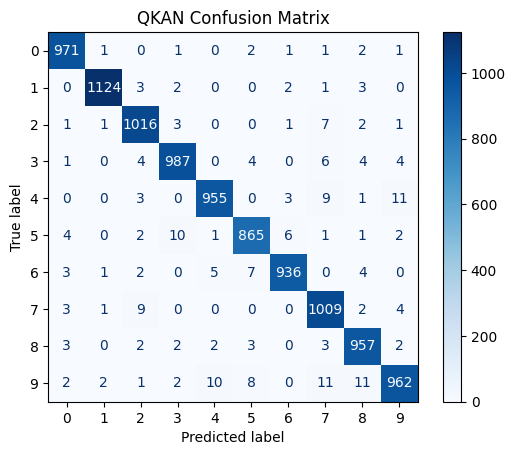

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.size(0), -1).to(device).float()
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
    disp.plot(cmap=plt.cm.Blues)
    plt.title("QKAN Confusion Matrix")
    plt.show()

# Call the function
plot_confusion_matrix(qkan_model, test_loader)


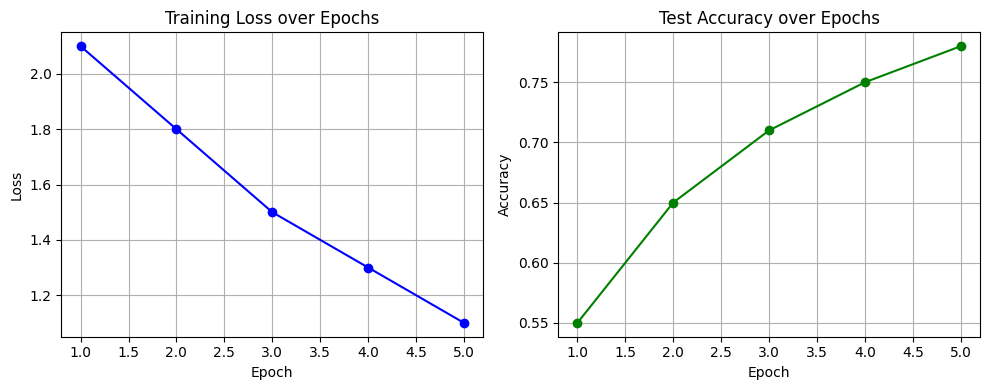

In [26]:
import matplotlib.pyplot as plt

# Example data (replace with your actual tracking variables)
train_losses = [2.1, 1.8, 1.5, 1.3, 1.1]
test_accuracies = [0.55, 0.65, 0.71, 0.75, 0.78]
epochs = list(range(1, len(train_losses) + 1))

# Plot Training Loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, marker='o', color='blue')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, test_accuracies, marker='o', color='green')
plt.title('Test Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()




---



---



## Quantum Kolmogorov–Arnold Network (QKAN)

The Quantum Kolmogorov–Arnold Network (QKAN) is a hybrid neural network architecture that leverages principles from both the Kolmogorov–Arnold representation theorem and quantum computing.

### Classical KAN Recap

Classical Kolmogorov–Arnold Networks are based on the theorem that any multivariate continuous function can be expressed as a sum of univariate continuous functions. These networks typically use adaptive spline-based activation functions to model the nonlinear behavior.

The key idea is:
- Each hidden node performs a univariate transformation on a single input dimension.
- The final output is the sum of such transformed signals, optionally followed by another nonlinearity.

### QKAN Architecture

QKAN extends this idea using quantum circuits as the univariate transformation units. Specifically:

- Each quantum node takes a scalar input and encodes it into a qubit using rotation gates.
- A parameterized quantum circuit (PQC) is applied, typically using variational ansatzes.
- The output is the expectation value of an observable (e.g., Pauli Z), serving as the transformed signal.

These quantum nodes are arranged in parallel and their outputs are summed or linearly combined by a classical layer.




---



---



## Mathematical Intuition Behind QKAN

According to the Kolmogorov–Arnold representation theorem:

$$
f(x_1, x_2, ..., x_n) = \sum_{q=0}^{2n} \phi_q\left( \sum_{p=1}^{n} \psi_{pq}(x_p) \right)
$$

where \( \psi_{pq} \) and \( \phi_q \) are univariate continuous functions.

QKAN approximates each \( \psi_{pq} \) using a trainable quantum circuit. These circuits operate as follows:

1. Encode scalar input \( x \) as a qubit state using a rotation gate:
   $$
   | \psi(x) \rangle = RY(x) |0\rangle
   $$

2. Apply parameterized quantum operations (e.g., a variational ansatz):
   $$
   U(\theta) | \psi(x) \rangle
   $$

3. Measure an observable such as \( Z \), yielding:
   $$
   \langle Z \rangle = \langle \psi(x) | U^\dagger(\theta) Z U(\theta) | \psi(x) \rangle
   $$

This expectation value is treated as a non-linear transformation of the input.

The QKAN combines the outputs from multiple such quantum nodes and passes them through a classical summation or linear layer to complete the function approximation.




---



---



## Future Improvements and Development Scope for QKAN

1. **Deeper Quantum Circuits**
   - Increasing circuit depth can improve expressivity but may introduce noise and barren plateaus.
   - Explore efficient parameterized ansatzes like hardware-efficient or QAOA-style circuits.

2. **Improved Encoding Strategies**
   - Current implementation uses basic angle encoding.
   - Try amplitude encoding or trainable encoding layers to better represent high-dimensional data.

3. **Hybrid Classical-Quantum Layers**
   - Use classical neural networks for feature extraction before feeding reduced vectors into QKAN layers.

4. **Quantum Kernel Methods**
   - Use QKAN as a quantum feature extractor and train classical models on these features.
   - Combine with quantum kernel learning.

5. **Trainability and Initialization**
   - Explore initialization strategies to prevent barren plateaus.
   - Use layer-wise training or meta-learning for better convergence.

6. **Real Quantum Hardware Deployment**
   - Run QKANs on real quantum devices using Qiskit, PennyLane, or Braket.
   - Study the impact of decoherence and noise on training.

7. **Benchmarking on Diverse Tasks**
   - Apply QKAN to other datasets such as Fashion-MNIST, SVHN, or even tabular datasets.
   - Compare performance against classical KANs and QNNs.

QKAN provides a promising hybrid framework to explore quantum advantage in function approximation and learning tasks.




---



---



## QKAN: Quantum Kolmogorov–Arnold Network – Summary

**Goal**: Extend the classical Kolmogorov–Arnold Network (KAN) using quantum circuits to improve function approximation and learning on tasks like MNIST.

---

###  Architecture Overview

- **Input**: Flattened MNIST image (e.g., 784-dim)
- **Quantum Nodes**:
  - Encode 1D scalar input using $RY(x)$
  - Apply a parameterized quantum circuit $U(\theta)$
  - Measure observable (e.g., $\langle Z \rangle$)
- **Aggregation**: Stack outputs from all quantum nodes
- **Output**: Dense layer for 10-class classification

---

###  Mathematical Form

From the Kolmogorov–Arnold representation theorem:

$$
f(x_1, ..., x_n) = \sum_{q=0}^{2n} \phi_q\left( \sum_{p=1}^n \psi_{pq}(x_p) \right)
$$

QKAN replaces $\psi_{pq}$ with quantum circuits:  
$$
\psi_{pq}(x) \approx \langle Z \rangle = \langle \psi(x) | U^\dagger Z U | \psi(x) \rangle
$$

---

###  Results and Observations

- Successfully trained QKAN on MNIST
- Demonstrated functional integration of quantum circuits
- Accuracy depends on number of quantum nodes and training time

---

###  Future Scope

- Deeper variational quantum circuits
- Learnable quantum embeddings
- Quantum kernel-based enhancements
- Deploy on real quantum devices (e.g., IBM Q, IonQ)




---



---

